# Ejemplo de Detección de Objetos usando MediaPipe

Para más información ver: https://developers.google.com/mediapipe/solutions/vision/object_detector#get_started

In [1]:
!pip install -q mediapipe

In [2]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

import mediapipe as mp

Cargar el modelo pre-entrenado en COCO (con 80 clases). Otros modelos se pueden encontrar en: https://developers.google.com/mediapipe/solutions/vision/object_detector#models


In [3]:
!wget -q -O efficientdet.tflite -q https://storage.googleapis.com/mediapipe-tasks/object_detector/efficientdet_lite2_uint8.tflite

Crear una instancia (objeto) para la detección usando la red pre-entrenada. 
Para más opciones en Python se puede ver: https://developers.google.com/mediapipe/solutions/vision/object_detector/python


In [4]:
options = mp.tasks.vision.ObjectDetectorOptions(
    base_options = mp.tasks.BaseOptions(model_asset_path = 'efficientdet.tflite'),
    max_results = 5,
    running_mode = mp.tasks.vision.RunningMode.IMAGE,
    score_threshold = 0.5)

detector = mp.tasks.vision.ObjectDetector.create_from_options(options)

Descargar una imagen

In [5]:
!wget -q https://storage.googleapis.com/mediapipe-tasks/object_detector/cat_and_dog.jpg

Cargar la imagen usando MediaPipe y detectar objetos usando el detector de Mediapipe

In [6]:
# Cargar la imagen
image = mp.Image.create_from_file('cat_and_dog.jpg')

In [7]:
# Detectar objetos en la imagen de entrada
detection_result = detector.detect(image)
detection_result

DetectionResult(detections=[Detection(bounding_box=BoundingBox(origin_x=307, origin_y=30, width=253, height=342), categories=[Category(index=None, score=0.82421875, display_name=None, category_name='dog')], keypoints=[]), Detection(bounding_box=BoundingBox(origin_x=75, origin_y=161, width=254, height=192), categories=[Category(index=None, score=0.78515625, display_name=None, category_name='cat')], keypoints=[])])

## Visualizar el resultado de la detección

In [8]:
def visualize(image, detection_result) -> np.ndarray:
    """Dibuja un cuadro delimitador en la imagen
    Args:
        image: Imagen RGB de entrada
        detection_result: Lista de las Detecciones encontradas
    Retorna:
        Imagen con cuadros delimitadores
    """
    TEXT_COLOR = (255, 0, 0)  # rojo
    MARGIN = 10; ROW_SIZE = 10
    for detection in detection_result.detections:
        # Dibujar cuadro delimitador (bounding_box)
        bbox = detection.bounding_box
        start_point = bbox.origin_x, bbox.origin_y
        end_point = bbox.origin_x + bbox.width, bbox.origin_y + bbox.height
        cv2.rectangle(image, start_point, end_point, TEXT_COLOR, 3)
        # Dibujar la etiqueta y el puntaje
        category = detection.categories[0]
        category_name = category.category_name
        probability = round(category.score, 2)
        result_text = category_name + ' (' + str(probability) + ')'
        text_location = (MARGIN + bbox.origin_x, MARGIN + ROW_SIZE + bbox.origin_y)
        # Parámetros para la visualización
        FONT_SIZE = 1; FONT_THICKNESS = 1
        cv2.putText(image, result_text, text_location, cv2.FONT_HERSHEY_PLAIN,
                    FONT_SIZE, TEXT_COLOR, FONT_THICKNESS)
    return image

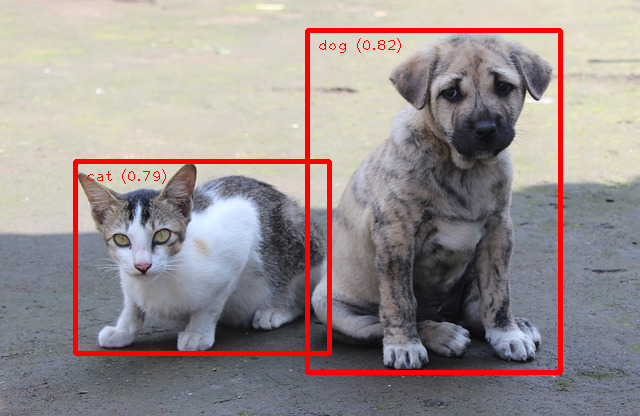

In [9]:
# Copiar la imagen de entrada
image_copy = np.copy(image.numpy_view())

# Añadir recuadros a la imagen de entrada
annotated_image = visualize(image_copy, detection_result)

# Cambiar los canales R y B (para OpenCV)
rgb_annotated_image = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)

# Mostrar el resultado
cv2_imshow(rgb_annotated_image)